In [213]:
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [214]:
import pandas as pd
df=pd.read_csv('Loan_Data_614.csv')
df.columns = [x.lower() for x in df.columns]

df.rename(columns=lambda x: x.strip(), inplace=True)
df.columns = df.columns.str.strip()
df['education'] = df['education'].str.strip()
df['self_employed'] = df['self_employed'].str.strip()
df['loan_status'] = df['loan_status'].str.strip()
df.drop(columns=['loan_id'], inplace=True)
df

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             601 non-null    object 
 1   married            611 non-null    object 
 2   dependents         599 non-null    object 
 3   education          614 non-null    object 
 4   self_employed      582 non-null    object 
 5   applicantincome    614 non-null    int64  
 6   coapplicantincome  614 non-null    float64
 7   loanamount         592 non-null    float64
 8   loan_amount_term   600 non-null    float64
 9   credit_history     564 non-null    float64
 10  property_area      614 non-null    object 
 11  loan_status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [216]:
df.isnull().sum().sort_values(ascending=False)

credit_history       50
self_employed        32
loanamount           22
dependents           15
loan_amount_term     14
gender               13
married               3
education             0
applicantincome       0
coapplicantincome     0
property_area         0
loan_status           0
dtype: int64

In [217]:
df['credit_history'] = df['credit_history'].astype('object')
df['credit_history'].dtype

dtype('O')

In [218]:
null_cols = ['credit_history', 'self_employed', 'loanamount', 'dependents', 'loan_amount_term', 'gender', 'married']

# Imputation loop
for col in null_cols:
    if df[col].dtype == 'object':
        # Impute categorical variables with mode
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)
        print(f"Imputed {col} with mode: {mode_value}")
    else:
        # Impute numerical variables with mean for non-binary, and mode for binary
        mean_value = df[col].mean()
        df[col].fillna(mean_value, inplace=True)
        print(f"Imputed {col} with mean: {mean_value}")

Imputed credit_history with mode: 1.0
Imputed self_employed with mode: No
Imputed loanamount with mean: 146.41216216216216
Imputed dependents with mode: 0
Imputed loan_amount_term with mean: 342.0
Imputed gender with mode: Male
Imputed married with mode: Yes


In [219]:
# Count Null v
df.isnull().sum().sort_values(ascending=False)

gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

In [220]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to the 'education' column
df['education'] = label_encoder.fit_transform(df['education'])
# Apply label encoding to the 'self_employed' column
#df['self_employed'] = label_encoder.fit_transform(df['self_employed'])
df['self_employed'] = df['self_employed'].replace(['Yes', 'No'], [1,0])
# Apply label encoding to the 'loan_status' column
#df['loan_status'] = label_encoder.fit_transform(df['loan_status'])
df['loan_status'] = df['loan_status'].replace(['Approved', 'Rejected'], [1,0])
df['loan_status'] = df['loan_status'].replace(['Y', 'N'], [1,0])
#df['loan_status'] = label_encoder.fit_transform(df['loan_status'])
df['gender'] = df['gender'].replace(['Male', 'Female'], [1,0])
df['married'] = df['married'].replace(['Yes', 'No'], [1,0])
df['property_area'] = df['property_area'].replace(['Urban', 'Semiurban', 'Rural'], [1,2, 3])

df['dependents'] = df['dependents'].replace(['0', '1', '2', '3', '3+'], [0,1,2,3,3])
#'0': 0, '1': 1, '2': 2, '3+': 3 ,
#df['dependents'] = label_encoder.fit_transform(df['dependents'])

df

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,1,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,3,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,1,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,3,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,3,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,1,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,1,1


In [221]:
#Mapping Categorical values

#label_mapping = {'Male': 1, 'Female': 0,
#'Yes': 1, 'No': 0,
#'0': 0, '1': 1, '2': 2, '3+': 3 ,
#'Graduate': 1, 'Not Graduate': 0,
#'Urban': 1, 'Semiurban': 2,'Rural': 3,
#'Y': 1, 'N': 0}

#df.replace(label_mapping, inplace=True)
#df

In [222]:
df

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,1,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,3,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,1,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,3,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,3,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,1,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,1,1


In [223]:
# Creating a correlation between the training dataset
corr_matrix = df.corr()
corr_matrix

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.009170,0.025752,0.017987
married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.010938,-0.004257,0.091478
dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.040160,0.000244,0.010118
education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.073658,0.065243,-0.085884
self_employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.001550,0.030860,-0.003700
applicantincome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.018615,0.009500,-0.004710
coapplicantincome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,0.011134,-0.010522,-0.059187
loanamount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.001431,0.044776,-0.036416
loan_amount_term,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.000432,0.077620,-0.020974
credit_history,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.001431,0.000432,1.000000,-0.001963,0.540556


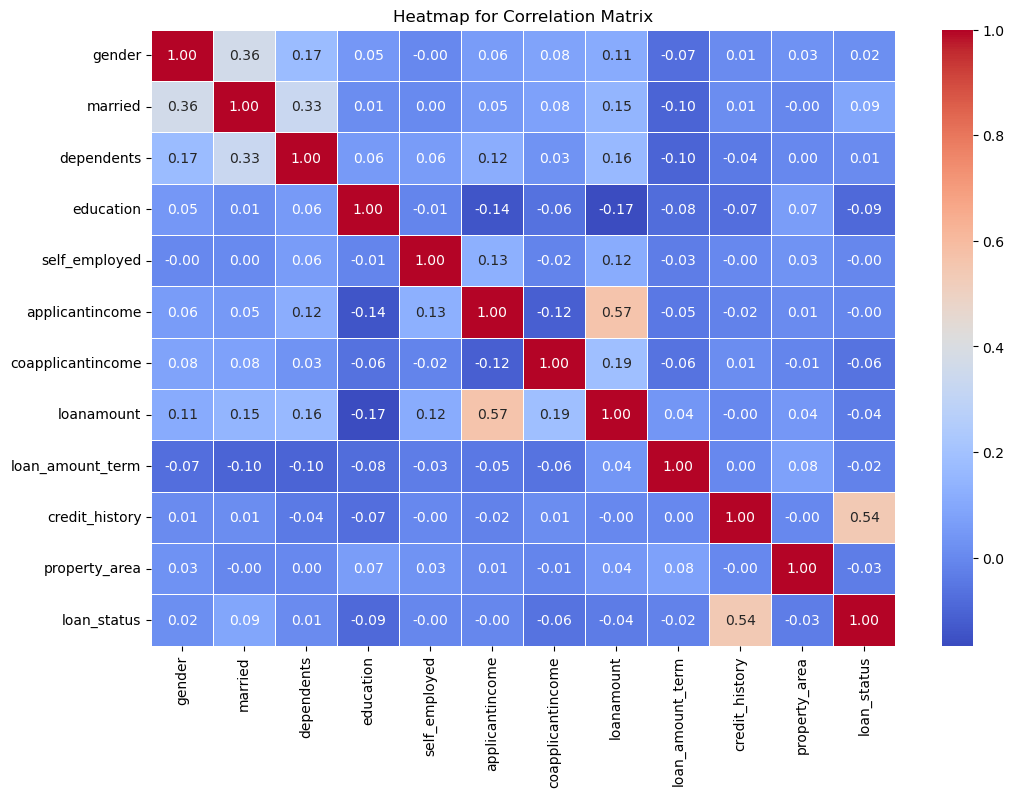

In [224]:
# Plotting Heatmap for better visualization
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title("Heatmap for Correlation Matrix")
plt.show()

In [225]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Define the feature columns (X) and target column (y)
x = df.drop(columns=['loan_status'])  # Drop 'loan_status' column to get feature columns
y = df['loan_status']  # Target variable

 
# Select only the numerical columns for scaling (excluding 'loan_status')
all_columns = [ 'gender', 'married', 'dependents', 'education', 'self_employed','applicantincome', 'coapplicantincome','loanamount','loan_amount_term', 'credit_history', 'property_area']
                     
numerical_columns= ['applicantincome', 'coapplicantincome', 'loanamount', 'loan_amount_term'   ]

 

trans_columns=numerical_columns
# Apply scaling to the numerical columns
x[trans_columns] = scaler.fit_transform(x[trans_columns])
#x = scaler.fit_transform(x)

# Display the scaled feature variables (X) and the target variable (y)
print("Scaled Feature Variables (x):")
print(x.head())

print("\nTarget Variable (y):")
print(y.head())

 

Scaled Feature Variables (x):
   gender  married  dependents  education  self_employed  applicantincome  \
0       1        0           0          0              0         0.072991   
1       1        1           1          0              0        -0.134412   
2       1        1           0          0              1        -0.393747   
3       1        1           0          1              0        -0.462062   
4       1        0           0          0              0         0.097728   

   coapplicantincome  loanamount  loan_amount_term  credit_history  \
0          -0.554487    0.000000          0.279851             1.0   
1          -0.038732   -0.219273          0.279851             1.0   
2          -0.554487   -0.957641          0.279851             1.0   
3           0.251980   -0.314547          0.279851             1.0   
4          -0.554487   -0.064454          0.279851             1.0   

   property_area  
0              1  
1              3  
2              1  
3         

In [226]:
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=0)

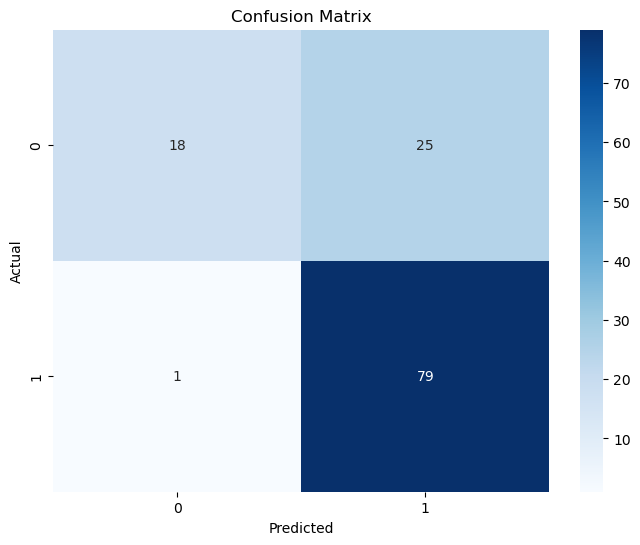

Accuracy: 0.7886178861788617
Precision: 0.8252526249958856
Recall: 0.7886178861788617
F1 Score: 0.7614910090194872
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [227]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a LogisticRegression instance
logistic_reg = LogisticRegression(random_state=42)

# Train the logistic regression model
logistic_reg.fit(x_train, y_train)

# Predict on the test set
y_pred = logistic_reg.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

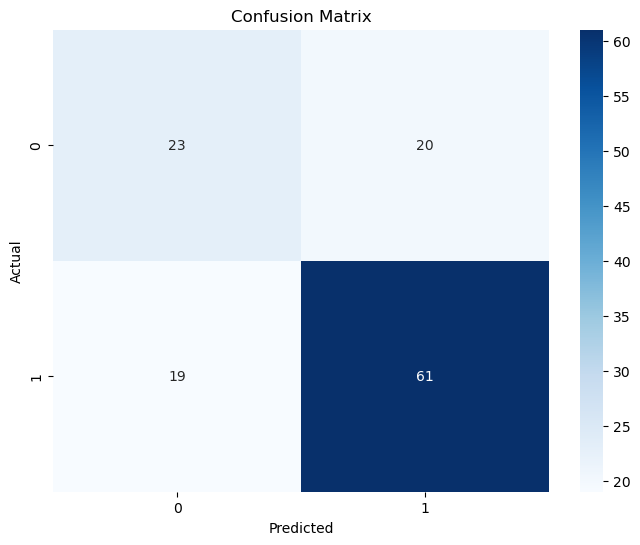

Decision Tree Classifier Metrics:
Accuracy: 0.6829268292682927
Precision: 0.6812563628281786
Recall: 0.6829268292682927
F1 Score: 0.6820463922578576
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.53      0.54        43
           1       0.75      0.76      0.76        80

    accuracy                           0.68       123
   macro avg       0.65      0.65      0.65       123
weighted avg       0.68      0.68      0.68       123



In [147]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DecisionTreeClassifier instance
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the decision tree model
decision_tree.fit(x_train, y_train)

# Predict on the test set
y_pred = decision_tree.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Decision Tree Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

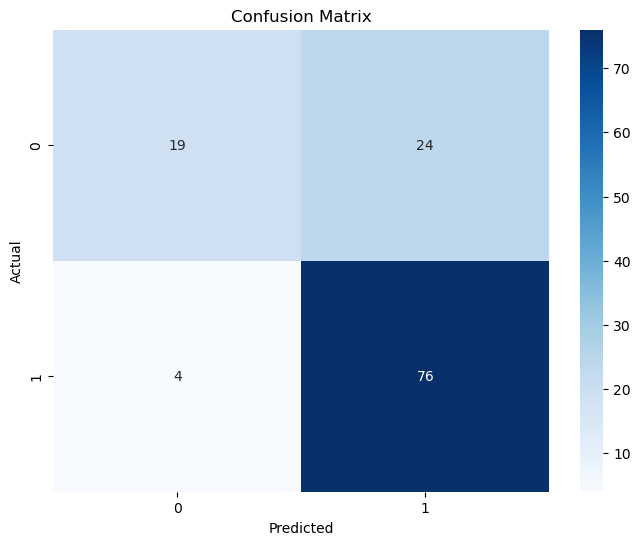

Random Forest Classifier Metrics:
Accuracy: 0.7723577235772358
Precision: 0.7831035701661364
Recall: 0.7723577235772358
F1 Score: 0.7505132627083847
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.44      0.58        43
           1       0.76      0.95      0.84        80

    accuracy                           0.77       123
   macro avg       0.79      0.70      0.71       123
weighted avg       0.78      0.77      0.75       123



In [148]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a RandomForestClassifier instance
random_forest = RandomForestClassifier(random_state=42)

# Train the random forest model
random_forest.fit(x_train, y_train)

# Predict on the test set
y_pred = random_forest.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Random Forest Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

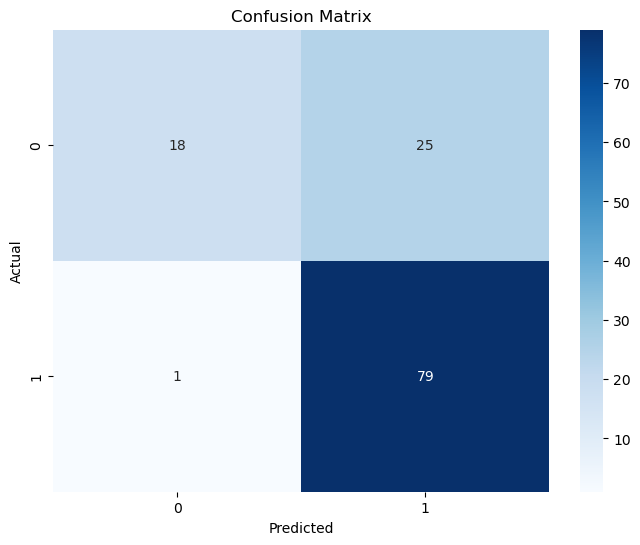

SVM Classifier Metrics:
Accuracy: 0.7886178861788617
Precision: 0.8252526249958856
Recall: 0.7886178861788617
F1 Score: 0.7614910090194872
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [149]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create an SVC (Support Vector Classification) instance
svm_classifier = SVC(random_state=42)

# Train the SVM model
svm_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("SVM Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

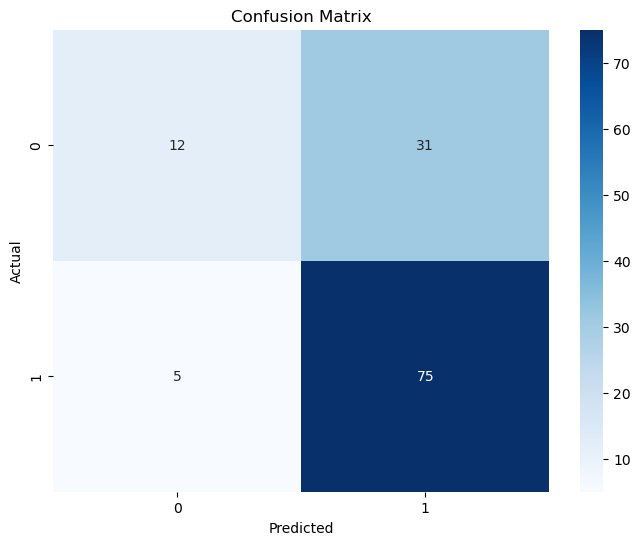

K-Nearest Neighbors Classifier Metrics:
Accuracy: 0.7073170731707317
Precision: 0.7069651606615955
Recall: 0.7073170731707317
F1 Score: 0.6643587726199843
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.28      0.40        43
           1       0.71      0.94      0.81        80

    accuracy                           0.71       123
   macro avg       0.71      0.61      0.60       123
weighted avg       0.71      0.71      0.66       123



In [150]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a KNeighborsClassifier instance with a specified number of neighbors (e.g., n_neighbors=5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = knn_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("K-Nearest Neighbors Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

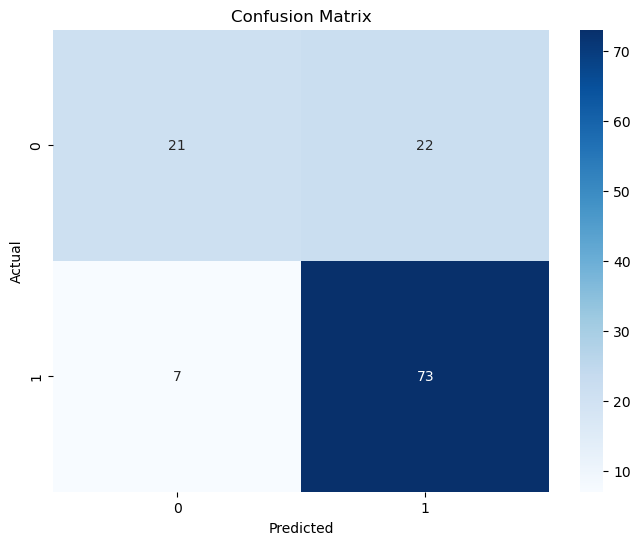

XGBoost Classifier Metrics:
Accuracy: 0.7642276422764228
Precision: 0.7619811724433033
Recall: 0.7642276422764228
F1 Score: 0.7494266411476992
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.49      0.59        43
           1       0.77      0.91      0.83        80

    accuracy                           0.76       123
   macro avg       0.76      0.70      0.71       123
weighted avg       0.76      0.76      0.75       123



In [151]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create an XGBClassifier instance
xgb_classifier = XGBClassifier(random_state=42)

# Train the XGBoost model
xgb_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = xgb_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("XGBoost Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

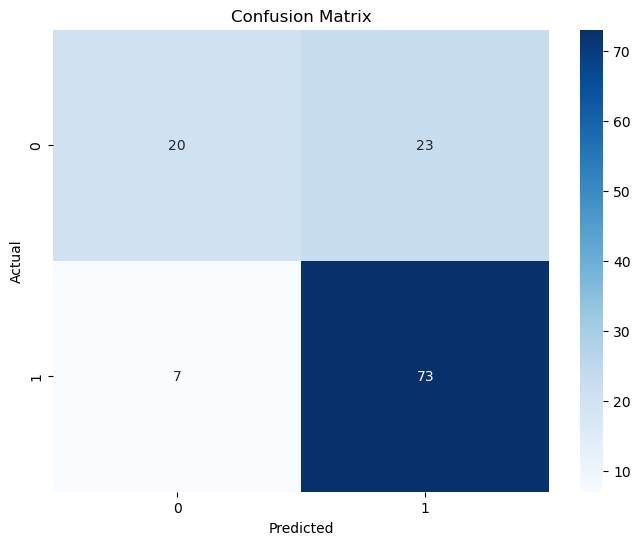

Ensemble Classifier Metrics:
Accuracy: 0.7560975609756098
Precision: 0.7535380909364648
Recall: 0.7560975609756098
F1 Score: 0.7393094710167881
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.47      0.57        43
           1       0.76      0.91      0.83        80

    accuracy                           0.76       123
   macro avg       0.75      0.69      0.70       123
weighted avg       0.75      0.76      0.74       123



In [152]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create individual classifiers
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgb_classifier = XGBClassifier(random_state=42)

# Create an ensemble of classifiers using VotingClassifier
ensemble_classifier = VotingClassifier(estimators=[
    ('decision_tree', decision_tree),
    ('random_forest', random_forest),
    ('xgb_classifier', xgb_classifier)
], voting='hard')  # 'hard' for majority vote

# Train the ensemble model
ensemble_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = ensemble_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Ensemble Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)